## Maths for ML - Coursework 2

In [1]:
import numpy as np
N = 25
X = np.reshape(np.linspace(0, 0.9, N), (N, 1))
Y = np.cos(10*X**2) + 0.1 * np.sin(100*X)

## Plot of data points

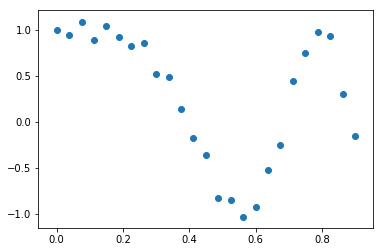

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X,Y)
plt.show()

## Kth order polynomial linear regression, with plot of different orders

In [3]:
def parameter(X, Y, dim, N):
    D = np.zeros((dim*N)).reshape(N,dim)
    w = D.shape[1]
    D[:,0] = 1
    for i in range(1,w):
        D[:,i] = (X**i).T
    theta = np.dot(np.dot(np.linalg.inv(np.dot(D.T,D)),D.T),Y)
    return theta

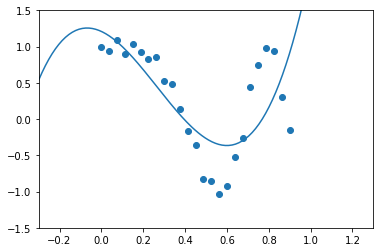

In [4]:
def plot(low,high,points,X, Y,theta):
    result = 0
    test = np.reshape(np.linspace(low, high, points), (points, 1))
    for i in range(0,len(theta)):
        result += theta[i]*test**i
    plt.scatter(X,Y)
    plt.xlim([low,high])
    plt.ylim([-1.5,1.5])
    plt.plot(test,result)
    plt.show()

# Plot of fourth order polynomial
    
dim = 4
theta = parameter(X, Y, dim, N)    
plot(-0.3,1.3,200,X,Y,theta)

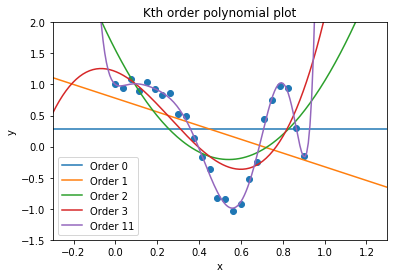

In [5]:
# Plot of multiple orders against data set, showing underfitting / overfitting

low = -0.3
high = 1.3
points = 200
order = [1,2,3,4,12]

test = np.reshape(np.linspace(low, high, points), (points, 1))
plt.scatter(X,Y)
for dim in order:
    result = np.zeros(points).reshape(points,1)
    theta = parameter(X, Y, dim, N)
    for i in range(0,len(theta)):
        result += theta[i]*test**i
    plt.plot(test,result,label='Order ' + str(dim-1))
plt.xlim([low,high])
plt.ylim([-1.5,2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kth order polynomial plot')
plt.legend()
plt.show()

## Trignometric function (i.e. cos and sin functions) linear regression

In [6]:
def trig(X, Y, dim, N):
    D = np.zeros((2*dim+1)*N).reshape(N,2*dim+1)
    w = D.shape[1]
    D[:,0] = 1
    for i in range(1,dim+1):
        D[:,2*i-1] = np.sin(2*np.pi*i*X).T
        D[:,2*i] = np.cos(2*np.pi*i*X).T
    theta = np.dot(np.dot(np.linalg.inv(np.dot(D.T,D)),D.T),Y)
    return theta

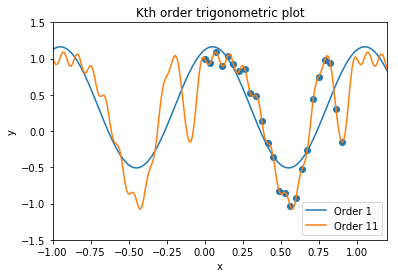

In [7]:
low = -1.0
high = 1.2
points = 200
order = [1,11]

test = np.reshape(np.linspace(low, high, points), (points, 1))
plt.scatter(X,Y)
for dim in order:
    D = np.zeros((2*dim+1)*points).reshape(points,2*dim+1)
    theta = trig(X, Y, dim, N)
    D[:,0] = 1
    for i in range(1,dim+1):
        D[:,2*i-1] = np.sin(2*np.pi*i*test).T
        D[:,2*i] = np.cos(2*np.pi*i*test).T
    prediction = np.dot(D,theta)   
    plt.plot(test,prediction,label='Order ' + str(dim))
plt.xlim([low,high])
plt.ylim([-1.5,1.5])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Kth order trigonometric plot')
plt.show()

## MSE and Variance MLE for range of orders for trignometric functions

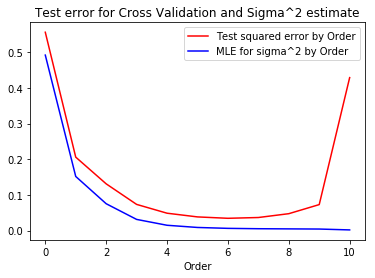

In [8]:
models = 10
result = []
sigma = []

# calculate mse for each model
for order in range(0,models+1):
    error = 0
    # Cross validation
    for j in range(0,len(X)):
        train_X = np.delete(X,j)
        train_Y = np.delete(Y,j)
        test_X = X[j]
        test_Y = Y[j]
        theta = trig(train_X, train_Y, order, len(train_X))
        D = np.zeros((2*order+1)).reshape(1,2*order+1)
        D[:,0] = 1
        for i in range(1,order+1):
            D[:,2*i-1] = np.sin(2*np.pi*i*test_X).T
            D[:,2*i] = np.cos(2*np.pi*i*test_X).T
        prediction = np.dot(D,theta)   
        error += (prediction-test_Y)**2
    result.append(error / (N-1))
    
# Calculating sigma MLE
for order in range(0,models+1):
    D = np.zeros((2*order+1)*N).reshape(N,2*order+1)
    theta = trig(X, Y, order, N)
    D[:,0] = 1
    for i in range(1,order+1):
        D[:,2*i-1] = np.sin(2*np.pi*i*X).T
        D[:,2*i] = np.cos(2*np.pi*i*X).T       
    sigma.append(np.dot((Y-np.dot(D,theta)).T,(Y-np.dot(D,theta)))/N)

sigma_plot = np.squeeze(sigma)

x = np.linspace(0,10,11)
    
plt.plot(x,result,c='r',label='Test squared error by Order')
plt.plot(x,sigma_plot,c='b',label='MLE for sigma^2 by Order')
plt.legend()
plt.xlabel('Order')
plt.title('Test error for Cross Validation and Sigma^2 estimate')
plt.show()

## Linear regression of Gaussian function

In [9]:
def gauss(x,mean,scale):
    return np.exp(-((x-mean)**2)/(2*scale**2))

def gauss_param(X, Y, dim, N, reg, means,scale):
    D = np.zeros((dim+1)*N).reshape(N,dim+1)
    D[:,0] = 1
    for i in range(1,dim+1):
        D[:,i] = gauss(X,means[i-1],scale).T
    theta = np.dot(np.dot(np.linalg.inv(np.dot(D.T,D)+reg*np.identity(dim+1)),D.T),Y)
    return theta

dim = 20
scale = 0.1

means = np.linspace(0,1,dim)

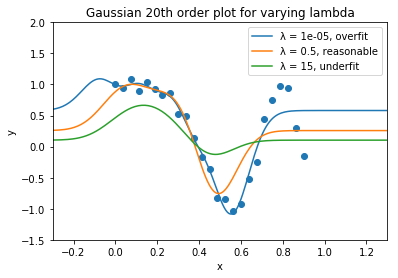

In [10]:
low = -0.3
high = 1.3
points = 200
order = 10
reg_term = [1e-05,0.5,15]
comments = ['overfit','reasonable','underfit']

# Gaussian function

test = np.reshape(np.linspace(low, high, points), (points, 1))
plt.scatter(X,Y)
for index, reg in enumerate(reg_term):
    theta = gauss_param(X, Y, order, N, reg, means, scale)
    D = np.zeros((order+1)*len(test)).reshape(len(test),order+1)
    D[:,0] = 1
    for i in range(1,order+1):
        D[:,i] = gauss(test,means[i-1],0.1).T
    prediction = np.dot(D,theta)   
    plt.plot(test,prediction,label='λ = ' + str(reg) + ", " + comments[index])
plt.xlim([low,high])
plt.ylim([-1.5,2.0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian 20th order plot for varying lambda')
plt.legend()
plt.show()